# ✅ RESUELTO — Red Neuronal Sencilla (FNN/MLP) en Digits (8×8)

**Objetivo:** reconocer dígitos (0–9) a partir de imágenes de **8×8 píxeles**.  
**Dataset:** `sklearn.datasets.load_digits`.

**Aprenderás a:**
- Preparar imágenes pequeñas para una red **MLP**.
- Entrenar con `MLPClassifier` y visualizar la **curva de pérdida**.
- Evaluar con `accuracy`, `classification_report` y `matriz de confusión`.

## Paso 0 — Imports y configuración

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(42)

## Paso 1 — Carga, escalado y split

In [2]:
digits = load_digits()
X, y = digits.data, digits.target  # X ya viene como (n, 64), píxeles 8x8 aplanados

# Escalado: importante para MLP (ayuda a converger)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Paso 2 — Definir y entrenar la MLP

In [3]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu",
                    solver="adam", alpha=1e-4, max_iter=300, random_state=42,
                    verbose=False)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {acc:.3f}")

Accuracy test: 0.969


## Paso 3 — Matriz de confusión e informe de clasificación

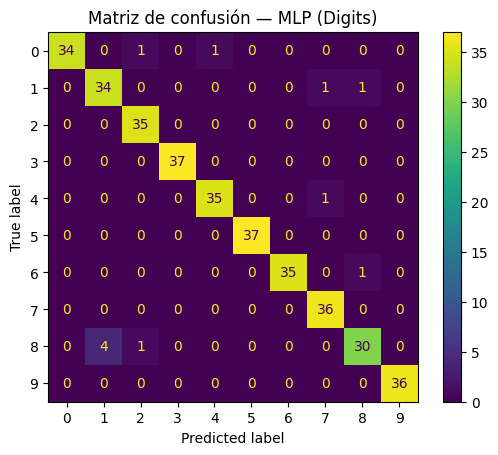

              precision    recall  f1-score   support

           0      1.000     0.944     0.971        36
           1      0.895     0.944     0.919        36
           2      0.946     1.000     0.972        35
           3      1.000     1.000     1.000        37
           4      0.972     0.972     0.972        36
           5      1.000     1.000     1.000        37
           6      1.000     0.972     0.986        36
           7      0.947     1.000     0.973        36
           8      0.938     0.857     0.896        35
           9      1.000     1.000     1.000        36

    accuracy                          0.969       360
   macro avg      0.970     0.969     0.969       360
weighted avg      0.970     0.969     0.969       360



In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión — MLP (Digits)")
plt.show()

print(classification_report(y_test, y_pred, digits=3))

## Paso 4 — Curva de pérdida (loss) durante el entrenamiento

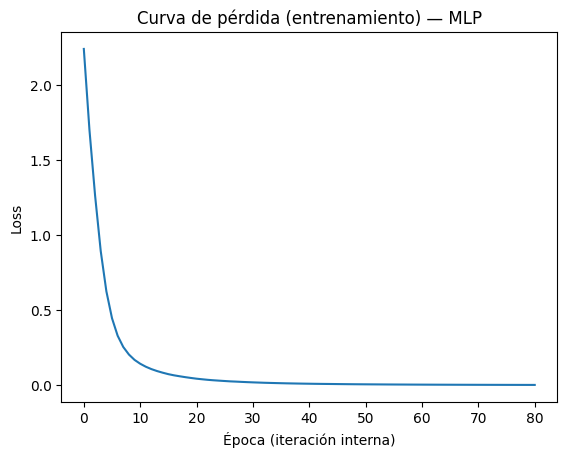

In [5]:
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title("Curva de pérdida (entrenamiento) — MLP")
plt.xlabel("Época (iteración interna)")
plt.ylabel("Loss")
plt.show()

## Paso 5 — Visualizar predicciones en imágenes

In [ ]:
# Mostrar 12 ejemplos de test con su predicción
idx = np.random.choice(len(y_test), size=12, replace=False)
images = X_test[idx]
labels_true = y_test[idx]
labels_pred = y_pred[idx]

plt.figure(figsize=(12, 4))
for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(images[i].reshape(8,8))
    plt.title(f"y={labels_true[i]} / ŷ={labels_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusión didáctica
- La **MLP** aprende fronteras no lineales y funciona muy bien en **Digits** con preprocesado adecuado.  
- La **curva de pérdida** permite diagnosticar convergencia y posibles ajustes (épocas, capas, regularización).